# <font color="blue">Performing OCR on Invoice Documents</font>

### <font color="green">Situation </font>
Mark works at an office where his job is to go through the invoices received and record the sender and the amount billed to a spreadsheet. It takes him only 1 minute to see the invoice and update the sheet. Still he finds it tedious and wants to automate this task. The main motivation for him is that he can then play on his system without any distractions. Will you help Mark in his pursuit of happiness?

### <font color="green">Your Task</font>
In this assignment, you will implement a OCR system, which looks at an image of the invoice and finds the following:

1. The Billing Amount ( 15 Marks )
1. Sender and Receiver Email IDs ( 15 Marks )

That's it! 

It requires knowledge of OCR to get the data from the image and then some basic python skills to get the required values from the recognized text.

The assignment will be manually graded ( so that you cannot simply look at the image and simply do a `print(billing_amount)`.

More information is given in the respective section.

# **Install dependencies**

In [1]:
!apt install libtesseract-dev tesseract-ocr > /dev/null
!pip install pytesseract
!pip install keras-ocr



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 16.4 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 604 kB 15.2 MB/s 
     |████████████████████████████████| 965 kB 61.7 MB/s 
     |████████████████████████████████| 9.5 MB 24.7 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=94fb89605c9855fd7fea4ee35b3a154885b02332c08139e28a94d2487e9757f5
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


## <font color="blue">Import Libraries.</font>
You may create a new cell and import other libraries if you want.

In [1]:
import pytesseract
import keras_ocr
import matplotlib.pyplot as plt
import cv2

## <font color="blue">Read and display the Test Image</font>

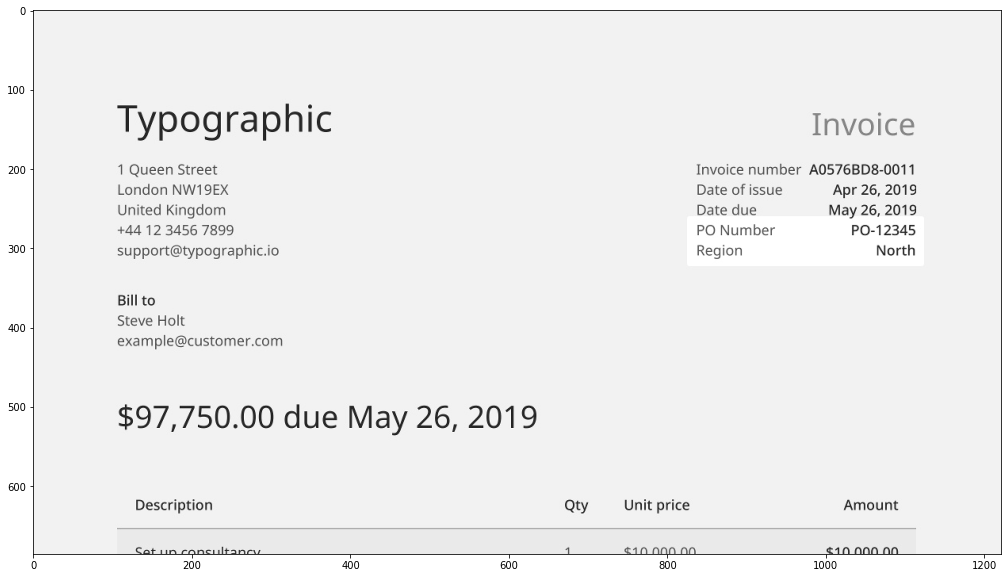

In [2]:
#doc_img = cv2.imread('../resource/asnlib/publicdata/invoice.jpg', cv2.IMREAD_COLOR)
doc_img = cv2.imread('/content/invoice.jpg', cv2.IMREAD_COLOR)
doc_img_grey = cv2.imread('/content/invoice.jpg', cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(20, 10))
#plt.imshow(doc_img[:,:,::-1])
plt.imshow(doc_img_grey, cmap='gray')
plt.show()

## <font color="blue">Perform OCR</font>

You need to write the code for performing OCR on the input image. You will have to apply the concepts learned in the previous sections to perform OCR on the above image.

After you perform the OCR - you have to parse the output so that you only print the email IDs and billing amount in $

### <font color="green">An example output is given below</font>
```
Extracted Billing Amount:
$97,750.00

Extracted Email IDs:
support@typographic.io
example@customer.com
```

In [12]:
billing_amount = []
email_ids = []

###
### YOUR CODE HERE
###


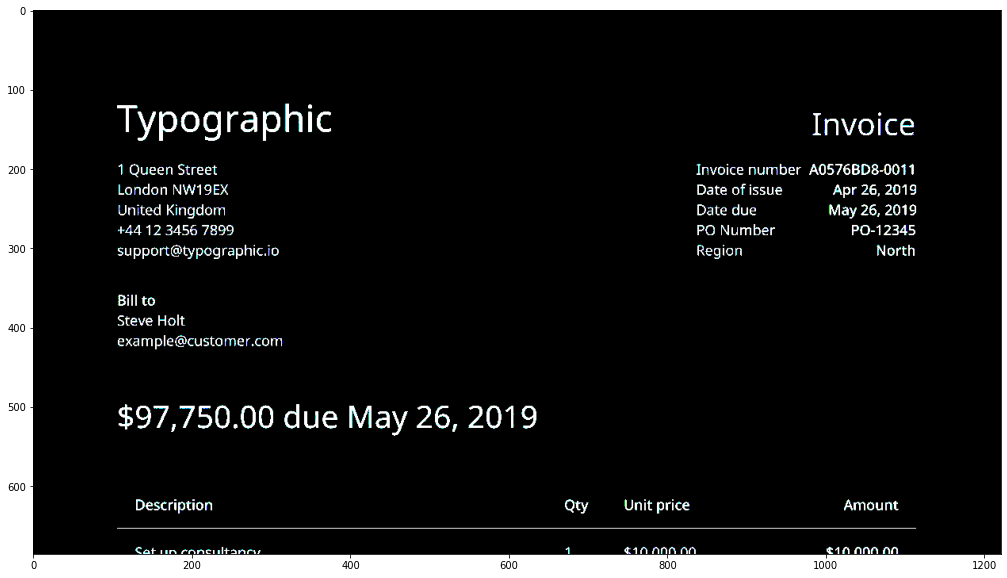

In [5]:
new_img = 255 - doc_img
_, thresh_img = cv2.threshold(new_img, 60, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(20, 10))
plt.imshow(thresh_img)
#thresh_img

In [7]:
#print(doc_img.shape)
#(686, 1221, 3)
detector = keras_ocr.detection.Detector()
thresh_img = keras_ocr.tools.read_and_fit(thresh_img, 1221, 686)
detection = detector.detect([thresh_img])

Looking for /root/.keras-ocr/craft_mlt_25k.h5
1/1 [==============================] - 11s 11s/step


In [8]:
print(thresh_img.shape)

(686, 1221, 3)


In [9]:
img = keras_ocr.tools.drawBoxes(thresh_img, detection[0])

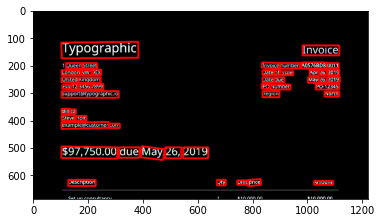

In [10]:
plt.imshow(img)

In [11]:
for box in detection[0]:
  cropped_img = keras_ocr.tools.warpBox(thresh_img, box)
  string = pytesseract.image_to_string(cropped_img)
  if("@" in string or "$" in string):
    print(string)
    # plt.imshow(cropped_img)
    # plt.show()

support@typographic.io

example@customer

$97,750.00



#### <font color="green">Challenge: Try and build an advanced version of the invoice reader where it can find all other information</font>